In [46]:
using Polynomials, SpecialPolynomials, Plots, SpecialFunctions, LinearAlgebra, Combinatorics, Distributions, StatsBase, QuadGK, CairoMakie
CairoMakie.activate!(; px_per_unit=1.0)

In [2]:
function ReFromCVec(CVec)
    IsRealEWise=[isreal(el) for el in CVec]
    return real(CVec[IsRealEWise])
end

ReFromCVec (generic function with 1 method)

In [3]:
BasicRootSim(n,nTrials)=vcat([ReFromCVec(roots(Polynomial(randn(n+1)))) for i in 1:nTrials]...)
KostlanWeight(n)=[binomial(n,i)^(1/2) for i in 0:n]
function KostlanRootSim(n,nTrials)
    K=KostlanWeight(n)
    ReRoots = vcat([ReFromCVec(roots(Polynomial(K .* randn(n+1)))) for i in 1:nTrials]...)
    return ReRoots
end

deg=4
nTrials=200
print(size(KostlanRootSim(deg,nTrials))) #currently broken---unique.jl the problem
print(sqrt(deg)*nTrials)

(400,)400.0

In [45]:
deg=4
nTrials=10000

#Update to CairoMakie??
p(x)=sqrt(1)/(1+x.^2)/pi
histogram(KostlanRootSim(deg,nTrials),bins=range(-20, 20, length=101),label="Simulated",normalize=:pdf)
plot!(p, label="Analytical", lw=2, color=:red)
xlabel!("t")
ylabel!("Density p(t) of a uniformly chosen root")
#title!("Comparison of numerical experiments with theoretical predictions: Case of "*string(nTrials)*" degree "*string(deg)*" polynomials generated in the Kostlan basis")
savefig("jplot_kostlanbasis.svg")

"C:\\Users\\Harry\\Documents\\MIT\\18338\\jplot_kostlanbasis.svg"

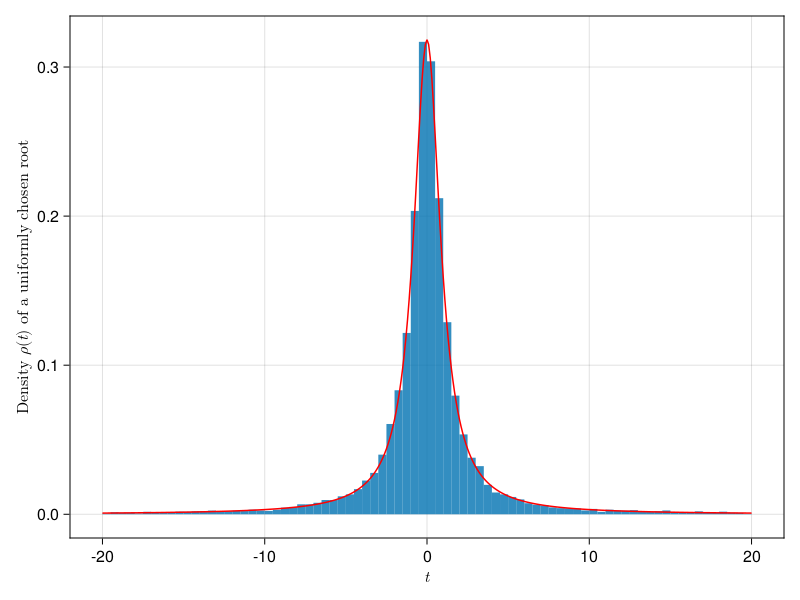

In [43]:
#CairoMakie version of kostlan plot
p(x)=sqrt(1)/(1+x.^2)/pi #normalised density (cauchy)
#histogram(KostlanRootSim(deg,nTrials),bins=range(-20, 20, length=101),label="Simulated",normalize=:pdf)
#plot!(p, label="Analytical", lw=2, color=:red)

f=Figure()
ax = Axis(f[1,1],
#title=L"Comparison of numerical experiments with theoretical predictions: Case of "*string(nTrials)*" degree "*string(deg)*" polynomials generated in the Kostlan basis",
xlabel=L"t",
ylabel=L"\text{Density }\rho(t) \text{ of a uniformly chosen root}"
)
hist!(KostlanRootSim(deg,nTrials),bins=(-20:0.5:20),normalization=:pdf)
lines!(-20:0.1:20,p,color=:red)

save("makie_kostlanbasis.png",f)
f

In [61]:
deg=10
nTrials=10000

RootCollection = BasicRootSim(deg,nTrials)
p(x)= sqrt((x^2-1)^(-2) - (deg+1)^2 * x^(2*deg) / (x^(2*deg+2)-1)^2) * nTrials / size(RootCollection)[1] /pi

histogram(RootCollection,bins=range(-10, 10, length=101),label="Simulated",normalize=:pdf)
plot!(p, label="Analytical", lw=2, color=:red)
xlabel!(L"t")
ylabel!(L"Density $\rho(t)$ of roots with multiplicity")
#title!("Comparison of numerical experiments with theoretical predictions: Case of "*string(nTrials)*" degree "*string(deg)*" polynomials generated in the monomial basis")
savefig("jplot_monomialbasis.svg")

"C:\\Users\\Harry\\Documents\\MIT\\18338\\jplot_monomialbasis.svg"

In [16]:
CairoMakie.activate!(; px_per_unit=2.0)
f=Figure()
#ax = Axis(f[1,1],
#title="Axisis object",
#xlabel="x axis labelele",
#ylabel="yaxi"
#)
hist(f[1,1],1:10)
f
save("testfigure.png",f)

CairoMakie.Screen{IMAGE}


In [57]:
print(L"\sin")

$\sin$